<a href="https://colab.research.google.com/github/Debdeep2025/CodeAlpha_Internship-task/blob/main/credit_scoring_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required packages if not already present
!pip install scikit-learn matplotlib seaborn --quiet

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# Simulating dataset (for real use-case, use pd.read_csv)
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=8, n_informative=5, n_redundant=2,
                           n_classes=2, weights=[0.7, 0.3], random_state=42)

df = pd.DataFrame(X, columns=['income', 'debt', 'age', 'loan_amount', 'credit_utilization',
                              'open_accounts', 'payment_history', 'late_payments'])
df['default'] = y  # Target variable

     income      debt       age  loan_amount  credit_utilization  \
0  0.243847 -0.164471 -0.705182    -0.015433           -0.078425   
1  0.650237  0.274936 -0.776536    -0.959132           -1.123291   
2 -3.390672 -0.590640 -1.343470     6.169133            1.222753   
3 -0.884536 -1.753849 -0.723131     3.966151            1.768521   
4  0.438060 -0.914989  0.953398    -0.033631           -0.048063   

   open_accounts  payment_history  late_payments  default  
0       0.730461         0.363777       0.727296        0  
1      -0.572504        -0.918580       0.073886        0  
2       1.439649        -1.715076       3.223089        1  
3       0.155163        -0.331125       1.551561        0  
4      -0.860909         0.511169      -0.449294        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   income              100

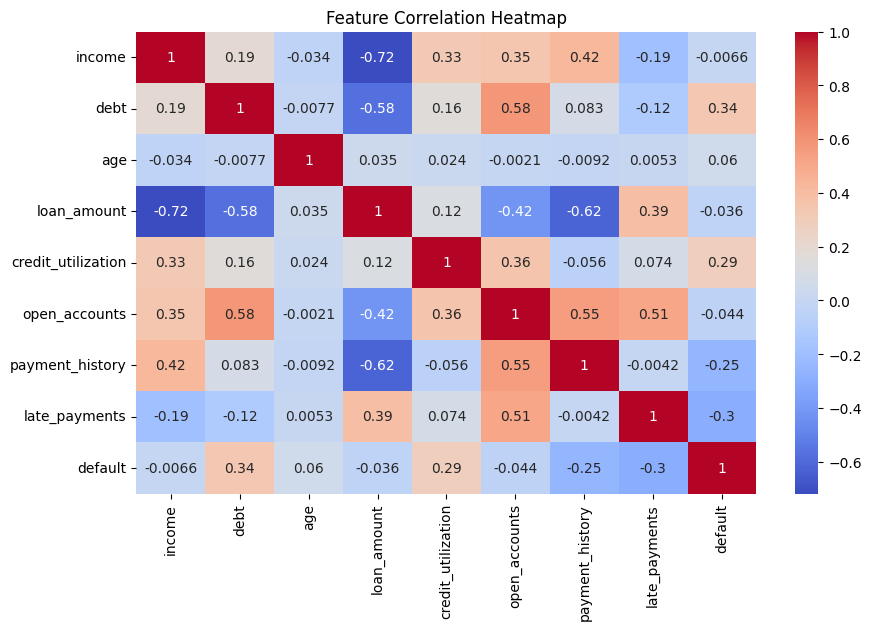

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Features and Target
X = df.drop('default', axis=1)
y = df['default']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC: {roc_auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

[[123  16]
 [ 35  26]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       139
           1       0.62      0.43      0.50        61

    accuracy                           0.74       200
   macro avg       0.70      0.66      0.67       200
weighted avg       0.73      0.74      0.73       200

ROC-AUC: 0.8310
[[121  18]
 [ 12  49]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       139
           1       0.73      0.80      0.77        61

    accuracy                           0.85       200
   macro avg       0.82      0.84      0.83       200
weighted avg       0.86      0.85      0.85       200

ROC-AUC: 0.8369
[[132   7]
 [ 14  47]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       139
           1       0.87      0.77      0.82        61

    accuracy                           0.90       200
   macro avg       0.89    

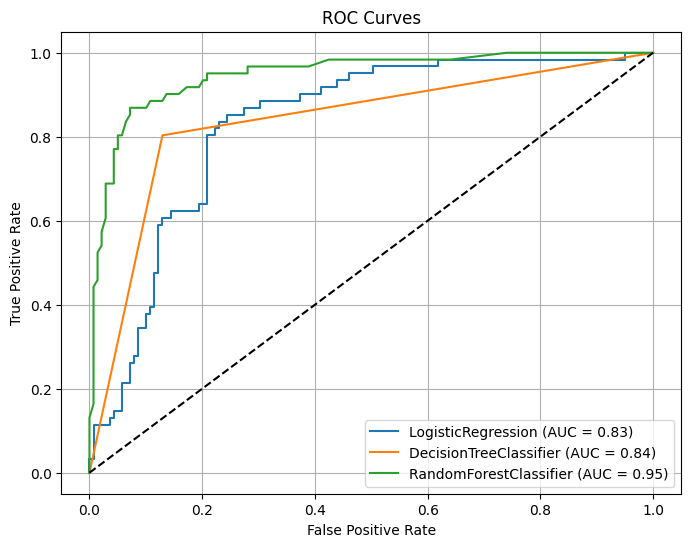

In [ ]:
plt.figure(figsize=(8, 6))
evaluate_model(log_model, X_test, y_test)
evaluate_model(tree_model, X_test, y_test)
evaluate_model(rf_model, X_test, y_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

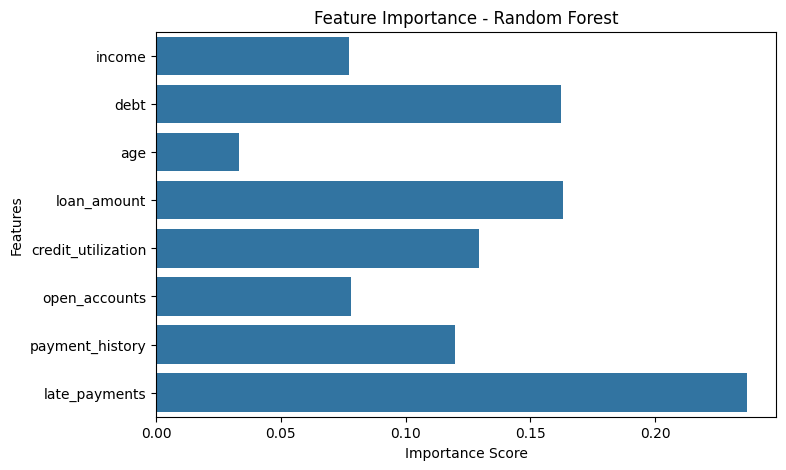

In [ ]:
# For Random Forest (best model in most cases)
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

[[128  11]
 [  9  52]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       139
           1       0.83      0.85      0.84        61

    accuracy                           0.90       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.90      0.90      0.90       200

ROC-AUC: 0.9521


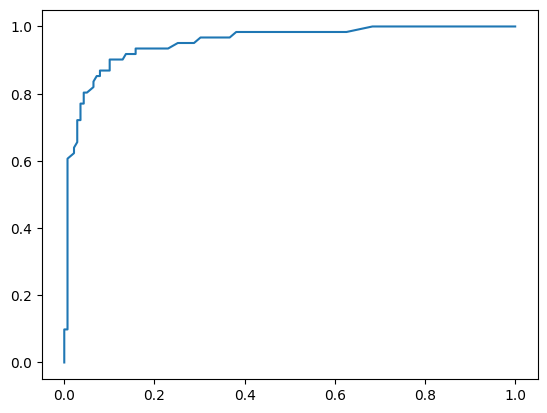

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Retrain Random Forest on balanced data
rf_model_bal = RandomForestClassifier()
rf_model_bal.fit(X_resampled, y_resampled)

evaluate_model(rf_model_bal, X_test, y_test)

In [ ]:
import joblib

joblib.dump(rf_model, "credit_score_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
# Example: New applicant's data
new_applicant = [[50000, 20000, 35, 10000, 0.3, 5, 0.8, 2]]
new_applicant_scaled = scaler.transform(new_applicant)
prediction = rf_model.predict(new_applicant_scaled)

print("Default Risk:" , "Yes" if prediction[0] == 1 else "No")

Default Risk: No


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
